In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on EU3
use_EU3 = []
for k in range (len(data)):
    if data['home_team'][k] == 'EU3' and data['away_team'][k] not in ['EU1', 'EU2', 'EU3']:
        use_EU3.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'EU3' and data['home_team'][g] not in ['EU1', 'EU2', 'EU3']:
        use_EU3.append(g)
data_eu3 = data.filter(items = use_EU3, axis = 0)
data_eu3 = data_eu3.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_eu3 = data_eu3.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_eu3 = data_eu3.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_eu3 = data_eu3.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_eu3)

            date      home_team      away_team  year  home  away  goal_margin
346   1924-06-29            EU3         Africa  1924     1    -1            5
1135  1950-07-13            EU3  South_America  1950    -1     1            1
1504  1958-06-08            EU3  North_America  1958     1    -1            3
1512  1958-06-29            EU3  South_America  1958    -1     1            3
1760  1962-10-11            EU3         Africa  1962     0     0            0
...          ...            ...            ...   ...   ...   ...          ...
8315  2018-03-27  North_America            EU3  2018    -1     1            1
8324  2018-05-28  North_America            EU3  2018     0     0            0
8365  2018-06-21  South_America            EU3  2018    -1     1            3
8377  2018-06-27  North_America            EU3  2018    -1     1            3
8379  2018-06-28           Asia            EU3  2018    -1     1            1

[267 rows x 7 columns]


In [4]:
eu = []
opponent = []
match_status = []
for x in range (len(data_eu3)):
    eu.append('EU3')
    if np.array(data_eu3['home_team'])[x] == 'EU3':
        opponent.append(np.array(data_eu3['away_team'])[x])
        match_status.append(np.array(data_eu3['home'])[x])
    else:
        opponent.append(np.array(data_eu3['home_team'])[x])
        match_status.append(np.array(data_eu3['away'])[x])
        
eu3 = pd.DataFrame(data = {'europe_tier3' : eu, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_eu3['goal_margin']), 'year' : np.array(data_eu3['year'])})

print(eu3)

    europe_tier3       opponent  match_status  goal_margin  year
0            EU3         Africa             1            5  1924
1            EU3  South_America            -1            1  1950
2            EU3  North_America             1            3  1958
3            EU3  South_America            -1            3  1958
4            EU3         Africa             0            0  1962
..           ...            ...           ...          ...   ...
262          EU3  North_America             1            1  2018
263          EU3  North_America             0            0  2018
264          EU3  South_America             1            3  2018
265          EU3  North_America             1            3  2018
266          EU3           Asia             1            1  2018

[267 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
eu3_asia = []
eu3_north_america =[]
eu3_south_america =[]
eu3_africa = []

for y in range (len(eu3)):
    if opponent[y] == 'Asia':
        eu3_asia.append(y)
    elif opponent[y] == 'North_America':
        eu3_north_america.append(y)
    elif opponent[y] == 'South_America':
        eu3_south_america.append(y)
    if opponent[y] == 'Africa':
        eu3_africa.append(y)
#verifying
print(len(eu3_africa) + len(eu3_asia) + len(eu3_south_america) + len(eu3_north_america) )

267


In [6]:
#eu3_vs_asia 
eu3_vs_asia = eu3.filter(items = eu3_asia, axis = 0)

#eu3_vs_north_america 
eu3_vs_north_america = eu3.filter(items = eu3_north_america, axis = 0)

#eu3_vs_south_america 
eu3_vs_south_america = eu3.filter(items = eu3_south_america, axis = 0)

#eu3_vs_africa 
eu3_vs_africa = eu3.filter(items = eu3_africa, axis = 0)

eu3_vs_asia.to_excel("Eu_Tier3_vs_Asia.xlsx", index = False)
eu3_vs_north_america.to_excel("Eu_Tier3_vs_North_America.xlsx", index = False)
eu3_vs_south_america.to_excel("Eu_Tier3_vs_South_America.xlsx", index = False)
eu3_vs_africa.to_excel("Eu_Tier3_vs_Africa.xlsx", index = False)

    europe_tier3 opponent  match_status  goal_margin  year
10           EU3     Asia             1            2  1970
18           EU3     Asia             1            3  1980
28           EU3     Asia             1            4  1990
32           EU3     Asia             1            1  1994
36           EU3     Asia             0            0  1994
..           ...      ...           ...          ...   ...
239          EU3     Asia             0            0  2006
240          EU3     Asia             1            4  2006
243          EU3     Asia             1            3  2006
251          EU3     Asia             0            0  2009
266          EU3     Asia             1            1  2018

[64 rows x 5 columns]


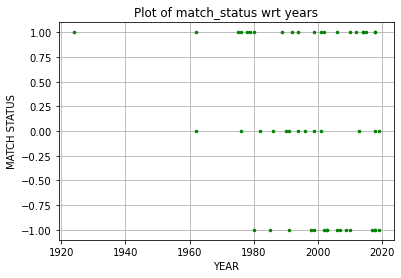

Text(0.5, 1.0, 'Histogram of match_status')

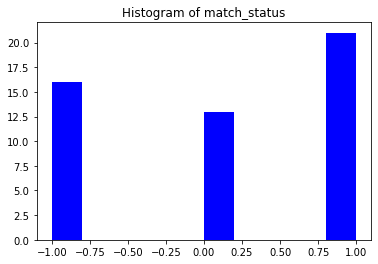

In [7]:
#checking
print(eu3_vs_asia)

#plot eu3_vs_africa
plt.plot(eu3_vs_africa['year'], eu3_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(eu3_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')